In [5]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.signal import savgol_filter

In [6]:
# ds_depth_2022 = Dataset("/Users/hritik/Documents/Project /Wave-Prediction/dAtA/Sea_surface/gebco_2022_n40.5_s38.5_w-11.0_e-8.5.nc")
# all_ds = Dataset("/Users/hritik/Documents/Project /Wave-Prediction/dAtA/cmems_mod_ibi_wav_anfc_0.027deg_PT1H-i_multi-vars_11.00W-8.53W_38.50N-40.97N_2022-12-01-2025-01-01.nc")
import xarray as xr

training_data_path1 = r'dAtA\cmems_mod_ibi_wav_my_0.027deg_PT1H-i_multi-vars_11.00W-8.53W_38.50N-40.47N_2020-01-01-2023-12-30.nc'
training_data_path2 = r'dAtA\cmems_mod_ibi_wav_my-aflux_0.027deg_P1H-i_TLA-TAUX-TAUY_11.00W-8.53W_38.50N-40.47N_2020-01-01-2023-12-30.nc'

all_ds =  Dataset(training_data_path1)
mini_ds =  Dataset(training_data_path2)

# ds1 = xr.open_dataset(training_data_path1, engine="netcdf4")
# ds2 = xr.open_dataset(training_data_path2, engine="netcdf4")
# merged_dataset = xr.merge([ds1, ds2], combine_attrs='drop')
# print(merged_dataset)

In [23]:
mini_ds.variables.keys()

dict_keys(['TLA', 'TAUX', 'TAUY', 'latitude', 'longitude', 'time'])

In [25]:
mini_ds["TLA"][0,:,:].data

array([[    99.,     99.,     99., ..., -32767., -32767., -32767.],
       [    99.,     99.,     99., ..., -32767., -32767., -32767.],
       [    99.,     99.,     99., ..., -32767., -32767., -32767.],
       ...,
       [    98.,     98.,     98., ..., -32767., -32767., -32767.],
       [    98.,     98.,     98., ..., -32767., -32767., -32767.],
       [    98.,     98.,     98., ..., -32767., -32767., -32767.]])

In [32]:
all_ds.variables.keys()

dict_keys(['VCMX', 'VHM0', 'VHM0_SW1', 'VHM0_SW2', 'VHM0_WW', 'VMDR', 'VMDR_SW1', 'VMDR_SW2', 'VMDR_WW', 'VMXL', 'VPED', 'VSDX', 'VSDY', 'VTM01_SW1', 'VTM01_SW2', 'VTM01_WW', 'VTM02', 'VTM10', 'VTPK', 'latitude', 'longitude', 'time'])

In [29]:
# copernicusmarine subset -i cmems_mod_ibi_wav_anfc_0.027deg_PT1H-i -t 2022-12-01 -T 2025-01-01 -y 38.5 -Y 41.0 -x -11.0 -X -8.5
['VCMX','VHM0','VHM0_SW1','VHM0_SW2','VHM0_WW','VMXL','VSDX','VSDY']
['VMDR','VMDR_SW1','VMDR_SW2','VMDR_WW','VPED','VTM01_SW1','VTM01_SW2','VTM01_WW','VTM02','VTM10','VTPK']
# VCMX        — Maximum crest trough wave height (Hc,max)  
# VHM0        — Spectral significant wave height (Hm0)  
# VHM0_SW1    — Spectral significant primary swell wave height  
# VHM0_SW2    — Spectral significant secondary swell wave height  
# VHM0_WW     — Spectral significant wind wave height  
# VMDR        — Mean wave direction from (Mdir)  
# VMDR_SW1    — Mean primary swell wave direction from  
# VMDR_SW2    — Mean secondary swell wave direction from  
# VMDR_WW     — Mean wind wave direction from  
# VMXL        — Height of the highest crest  
# VPED        — Wave principal direction at spectral peak [The wave principal direction at spectral peak is the direction (angle) from which the most energetic waves are arriving, at the dominant frequency of the wave spectrum.] 
# VSDX        — Stokes drift U  
# VSDY        — Stokes drift V  
# VTM01_SW1   — Spectral moments (0,1) primary swell wave period  (swell means waves that are not generated by the local wind, but by distant weather systems)
# VTM01_SW2   — Spectral moments (0,1) secondary swell wave period  
# VTM01_WW    — Spectral moments (0,1) wind wave period  
# VTM02       — Spectral moments (0,2) wave period (Tm02)  
# VTM10       — Spectral moments (-1,0) wave period (Tm-10)  
# VTPK        — Wave period at spectral peak / peak period (Tp) 

# TAUX     -Surface downward eastward stress due to ocean viscous dissipation
# TAUY     -Surface downward northward stress due to ocean viscous dissipation
# TLA      -Wave mixing energy flux into sea water 

# latitude    — Latitude  
# longitude   — Longitude  
# time        — 24×((15×31)+(8×30)+(2×28)) + 24 + 1 = 18289

['VMDR',
 'VMDR_SW1',
 'VMDR_SW2',
 'VMDR_WW',
 'VPED',
 'VTM01_SW1',
 'VTM01_SW2',
 'VTM01_WW',
 'VTM02',
 'VTM10',
 'VTPK']

In [7]:
sz = 10000

time = all_ds.variables['time'][:sz]              # shape: (ntime,)
lat = all_ds.variables['latitude'][:sz]           # shape: (nlat,)
lon = all_ds.variables['longitude'][:sz]          # shape: (nlon,)

# Create a meshgrid of coordinates
time_grid, lat_grid, lon_grid = np.meshgrid(time, lat, lon, indexing='ij')
var_names = [
    'VCMX', 'VHM0', 'VHM0_SW1', 'VHM0_SW2', 'VHM0_WW',
    'VMDR', 'VMDR_SW1', 'VMDR_SW2', 'VMDR_WW',
    'VMXL', 'VPED', 'VSDX', 'VSDY',
    'VTM01_SW1', 'VTM01_SW2', 'VTM01_WW',
    'VTM02', 'VTM10', 'VTPK'
]

data = {}
for var in var_names:
    print(f'Loading {var}...')
    arr = all_ds.variables[var][:sz]              # shape: (time, lat, lon) 
    data[var] = arr.ravel()                     # flatten to 1D
    
for var in ['TLA','TAUX','TAUY']:
    print(f'Loading {var}...')
    arr = mini_ds.variables[var][:sz].data              
    data[var] = arr.ravel() 

# Build the DataFrame
df = pd.DataFrame({
    'time': time_grid.ravel(),
    'latitude': lat_grid.ravel(),
    'longitude': lon_grid.ravel(),
    **data
})

# print(df.head())
# print(df.info())

Loading VCMX...
Loading VHM0...
Loading VHM0_SW1...
Loading VHM0_SW2...
Loading VHM0_WW...
Loading VMDR...
Loading VMDR_SW1...
Loading VMDR_SW2...
Loading VMDR_WW...
Loading VMXL...
Loading VPED...
Loading VSDX...
Loading VSDY...
Loading VTM01_SW1...
Loading VTM01_SW2...
Loading VTM01_WW...
Loading VTM02...
Loading VTM10...
Loading VTPK...
Loading TLA...
Loading TAUX...
Loading TAUY...


In [8]:
df['VSDmag'] = np.sqrt(df['VSDX']**2 + df['VSDY']**2)

In [48]:
vmdr_rad = np.radians(df['VMDR'])
df['VMDR_sin'] = np.sin(vmdr_rad)
df['VMDR_cos'] = np.cos(vmdr_rad)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64800000 entries, 0 to 64799999
Data columns (total 28 columns):
 #   Column     Dtype  
---  ------     -----  
 0   time       float32
 1   latitude   float32
 2   longitude  float32
 3   VCMX       float64
 4   VHM0       float64
 5   VHM0_SW1   float64
 6   VHM0_SW2   float64
 7   VHM0_WW    float64
 8   VMDR       float64
 9   VMDR_SW1   float64
 10  VMDR_SW2   float64
 11  VMDR_WW    float64
 12  VMXL       float64
 13  VPED       float64
 14  VSDX       float64
 15  VSDY       float64
 16  VTM01_SW1  float64
 17  VTM01_SW2  float64
 18  VTM01_WW   float64
 19  VTM02      float64
 20  VTM10      float64
 21  VTPK       float64
 22  TLA        float64
 23  TAUX       float64
 24  TAUY       float64
 25  VSDmag     float64
 26  VMDR_sin   float64
 27  VMDR_cos   float64
dtypes: float32(3), float64(25)
memory usage: 12.8 GB


In [36]:
# Apply Savitzky-Golay filter to each column
window_length = 51  # Must be odd
polyorder = 3       # Degree of polynomial
df_smooth = df.copy()
for var in var_names:
    df_smooth[var] = savgol_filter(df[var], window_length=window_length, polyorder=polyorder)

In [12]:
df.shape

(64800000, 25)

In [27]:
df.isnull().sum()

time                0
latitude            0
longitude           0
VCMX         16020000
VHM0         16020000
VHM0_SW1     16020000
VHM0_SW2     16020000
VHM0_WW      16020000
VMDR         16020000
VMDR_SW1     16020000
VMDR_SW2     16020000
VMDR_WW      16020000
VMXL         16020000
VPED         16020000
VSDX         23013491
VSDY         16020000
VTM01_SW1    16020000
VTM01_SW2    16020000
VTM01_WW     16020000
VTM02        16020000
VTM10        16020000
VTPK         16020000
TLA                 0
TAUX                0
TAUY                0
dtype: int64

In [50]:
corr_matrix = df.corr()

<Axes: >

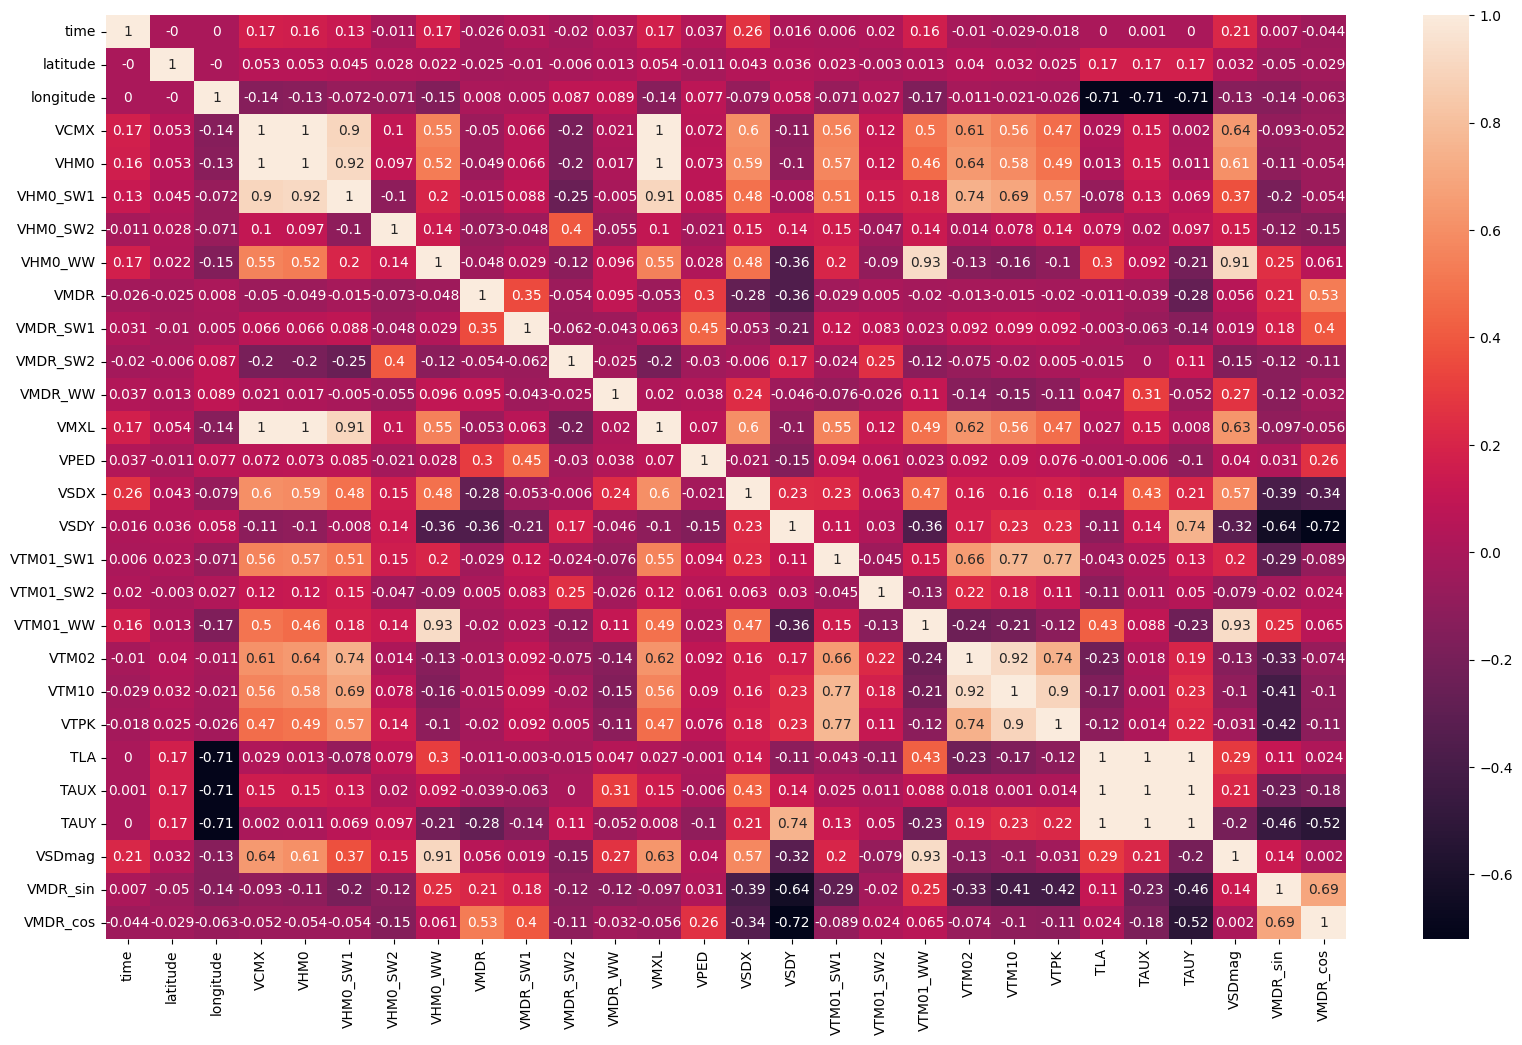

In [51]:
plt.figure(figsize=(20,12))
sns.heatmap(round(corr_matrix,3),annot=True)

In [45]:
corr_matrix1 = df[selected].corr()

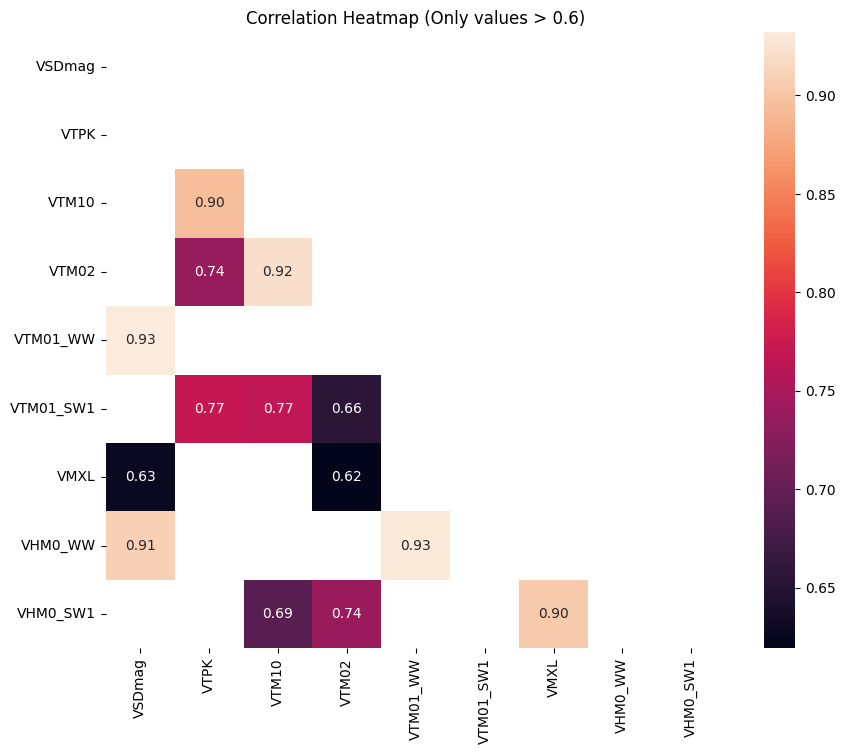

In [47]:
threshold = 0.6
mask = np.zeros_like(corr_matrix1, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Combine this with a mask for values that do not meet the threshold
mask = mask | (np.abs(corr_matrix1) <= threshold)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix1, mask=mask, annot=True, fmt=".2f")
plt.title(f'Correlation Heatmap (Only values > {threshold})')
plt.show()

In [ ]:
selected = ['VSDmag','VTPK','VTM10','VTM02','VTM01_WW','VTM01_SW1','VMXL','VHM0_WW','VHM0_SW1']

In [43]:
def correlation(corr_matrix, threshold):
    col_corr = set()  
    for i in range(len(corr_matrix.columns)):
        
        for j in range(i):
            # if corr_matrix.columns[j] in selected:
                if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                    colname = corr_matrix.columns[i]  # getting the name of column
                    col_corr.add(colname)
    return col_corr
print(correlation(corr_matrix[selected], 0.7))

{'VTM01_SW1', 'VHM0_WW'}


In [22]:
print(correlation(corr_matrix, 0.7))

set()


In [39]:
# import plotly.express as px

# subset = df[df['time'] == df['time'].iloc[0]]  # First time step
# fig = px.scatter_geo(subset, lat='latitude', lon='longitude', color='wave_height',
#                      title='Wave height at first timestep')
# fig.show()

In [40]:
df['VCMX'].shape

(8100000,)

In [41]:
# lat1 , log1  = np.meshgrid(lat,lon)
# fig = plt.figure(figsize=(10,10))
# ass = fig.add_subplot(111, projection = '3d') 

# surf = ass.plot_surface(lat1,log1,df['VCMX'])
# plt.show()

<Axes: title={'center': 'Max wave height over time'}, xlabel='time'>

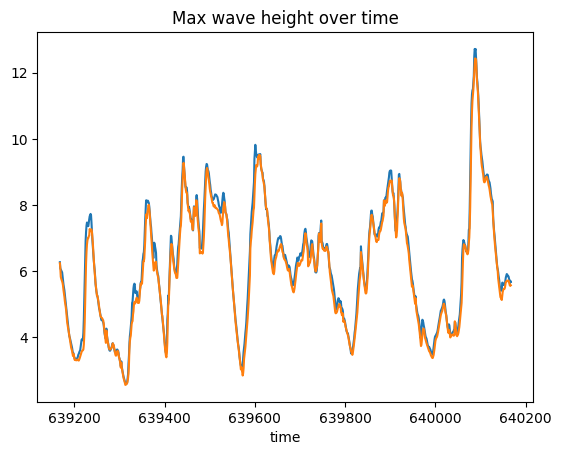

In [43]:
df.groupby('time')['VCMX'].max().plot(title='Max wave height over time')
df_smooth.groupby('time')['VCMX'].max().plot(title='Max wave height over time')
# df_smooth.groupby('time')['VHM0'].max().plot(title='Mean wave height over time')

<Axes: title={'center': 'Mean wave height over time'}, xlabel='time'>

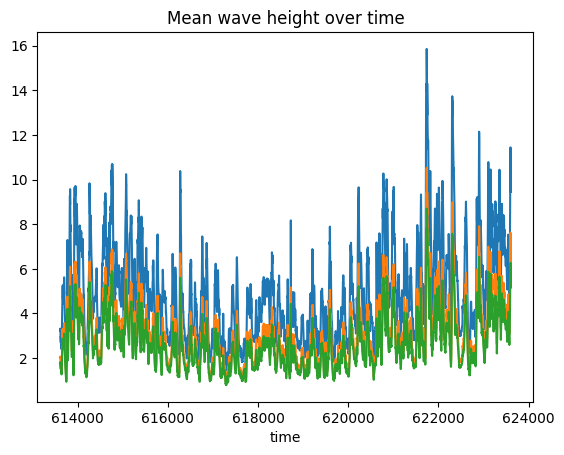

In [17]:
df.groupby('time')['VCMX'].max().plot(title='Max wave height over time')
df.groupby('time')['VMXL'].max().plot(title='Mean wave height over time')
df.groupby('time')['VHM0'].max().plot(title='Mean wave height over time')


In [47]:
from sklearn.model_selection import train_test_split

X = df_smooth.drop(columns = ['VCMX'])
y=df_smooth['VCMX']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, shuffle = False)

In [48]:
from sklearn.model_selection import train_test_split

target_var = 'VCMX'

X = df_smooth.drop(columns=[target_var])  
y = df_smooth[target_var]                

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    shuffle=False  # Important for time series!
)


print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (4860000, 21)
X_test: (3240000, 21)
y_train: (4860000,)
y_test: (3240000,)


In [20]:
# pip install xgboost

In [21]:
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest  = xgb.DMatrix(X_test, label=y_test)

# params = {
#     'max_depth': 6,
#     'eta': 0.05,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
#     'objective': 'reg:squarederror',
#     'eval_metric': 'rmse'
# }

# evals = [(dtrain, "train"), (dtest, "test")]
# bst = xgb.train(params, dtrain, num_boost_round=1000, evals=evals,
#                 early_stopping_rounds=50, verbose_eval=50)

# # ------------------------------
# # Evaluate
# # ------------------------------
# y_pred = bst.predict(dtest)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# print(f"Test RMSE: {rmse:.3f}")

# # ------------------------------
# # Forecast next step
# # ------------------------------
# latest_features = X.iloc[-1:]
# dnext = xgb.DMatrix(latest_features)
# forecast = bst.predict(dnext)
# print(f"Next hour wave height forecast: {forecast[0]:.3f}")

In [22]:
# pip install lightgbm

In [23]:
# import lightgbm as lgb
# from sklearn.metrics import mean_squared_error

# train_data = lgb.Dataset(X_train, label=y_train)
# test_data  = lgb.Dataset(X_test, label=y_test, reference=train_data)

# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'boosting_type': 'gbdt',
#     'num_leaves': 64,
#     'learning_rate': 0.05,
#     'feature_fraction': 0.8,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'verbose': -1
# }

# bst = lgb.train(params,
#                 train_data,
#                 valid_sets=[train_data, test_data],
#                 num_boost_round=2000,
#                 early_stopping_rounds=100,
#                 verbose_eval=100)

# # ------------------------------
# # Evaluate
# # ------------------------------
# y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# print(f"Test RMSE: {rmse:.3f}")

# # ------------------------------
# # Forecast next step
# # ------------------------------
# latest_features = X.iloc[-1:]
# forecast = bst.predict(latest_features, num_iteration=bst.best_iteration)
# print(f"Next hour wave height forecast: {forecast[0]:.3f}")

In [ ]:
print (sfsdfdsddf)

# Depth Analysys

In [ ]:
ds_depth_2022.variables.keys()

dict_keys(['lat', 'lon', 'elevation'])

In [ ]:
ds_depth_2022.variables['elevation'].shape

(480, 600)

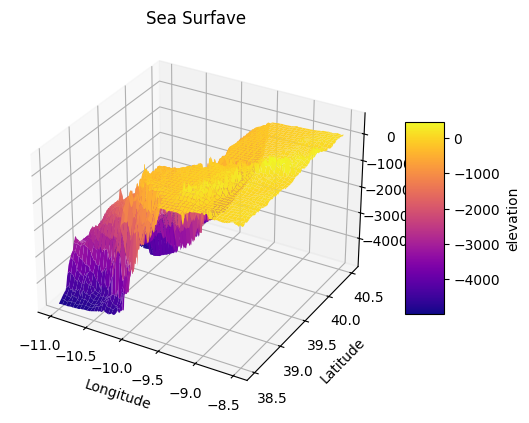

In [ ]:
lat = ds_depth_2022.variables['lat'][:]
lon = ds_depth_2022.variables['lon'][:]
elev = ds_depth_2022.variables['elevation'][:] 

# Create meshgrid for lat and lon
Lon, Lat = np.meshgrid(lon, lat)

# Plot
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

# 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Blues'
surf = ax.plot_surface(Lon, Lat, elev, cmap='plasma', edgecolor='none')

# ax.view_init(roll=0, azim=0)  # Adjust the view angle as needed
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth (m)')
ax.set_title(f'Sea Surfave')
fig.colorbar(surf, shrink=0.5, aspect=5, label='elevation')

plt.show()

In [ ]:
import plotly.graph_objects as go
# 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Blues', 'Pinkyl'
fig = plt.figure(figsize=(18, 15))
fig = go.Figure(
    data=go.Surface(z=elev, x=lon, y=lat, colorscale='BuGn')
)
fig.update_layout(title='Sea Surface', autosize=True, width=1200 , height = 1000 )

fig.show()

<Figure size 1800x1500 with 0 Axes>

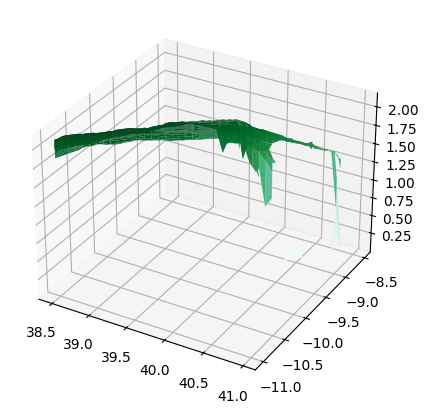

In [ ]:
from mpl_toolkits.mplot3d import axis3d

fig = plt.figure(figsize=(6,5))
ax=fig.add_subplot(111, projection='3d')

# ax.view_init(roll=0, azim=0)

lat1=all_ds.variables["latitude"][:]
lon1=all_ds.variables["longitude"][:]

surf = ax.plot_surface(lat1,lon1,all_ds.variables["VHM0"][100,:,:],cmap='BuGn',  edgecolor='none')


In [ ]:
all_ds.variables["VHM0"][0,0,0]
print(np.min(all_ds.variables["VHM0"][:,:,:]))
print(np.max(all_ds.variables["VHM0"][:,:,:]))

0.0
10.37999976798892


In [ ]:
# import plotly.graph_objects as go1

# Lon, Lat = np.meshgrid(lon1, lat1) 
# fig = plt.figure(figsize=(12, 5))
# fig=go1.Figure(
#     data = go1.Surface(x=lat1,y=lon1,z=all_ds.variables["VCMX"][100,:,:], colorscale='BuGn')
    
# )
# fig.update_layout(
#     title='Significant Wave Height',
#     scene=dict(
#         xaxis_title='Longitude',
#         yaxis_title='Latitude',
#         zaxis_title='VHM0 (m)'
#     ),
#     width = 1200,
#     height = 1000
# )
# fig.show()

In [16]:
plt.figure(figsize=(12, 5))
# plt.plot(all_ds.variables["time"][:],all_ds.variables["VCMX"][:,0,0],color = "green")
plt.plot(mini_ds.variables["time"][:],mini_ds.variables["TUAX"][:,0,0],color = "pink")

KeyError: 'TUAX'

<Figure size 1200x500 with 0 Axes>

copernicusmarine subset -i cmems_mod_ibi_wav_anfc_0.027deg_PT1H-i -t 2022-12-01 -T 2025-01-01 -y 38.5 -Y 41.0 -x -11.0 -X -8.5

Time : 24×((15×31)+(8×30)+(2×28)) + 24 + 1